In [5]:
pip install kats

  Using cached kats-0.2.0-py3-none-any.whl (612 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached ax_platform-0.2.4-py3-none-any.whl (950 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Admin\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-5k1q2j0y\\fbprophet_e6fa1aa0897440caad1ddd31389b4411\\setup.py'"'"'; __file__='"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-5k1q2j0y\\fbprophet_e6fa1aa0897440caad1ddd31389b4411\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Admin\AppData\Local\Temp\pip-wheel-o1s51x80'
       cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-5k1q2j0y\fbprophet_e6fa1aa0897440caad1ddd31389b4411\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL

In [8]:
pip install pystan==2.19.1.1

Note: you may need to restart the kernel to use updated packages.


In [9]:
conda install gcc

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - gcc

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [10]:
conda install -c conda-forge fbprophet

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py38haa244fe_0         1.0 MB  conda-forge
    convertdate-2.4.0          |     pyhd8ed1ab_0          38 KB  conda-forge
    ephem-4.1.3                |   py38h294d835_4         1.3 MB  conda-forge
    fbprophet-0.7.1            |   py38h7ae7562_0         572 KB  conda-forge
    hijri-converter-2.2.3      |     pyhd8ed1ab_0          17 KB  conda-forge
    holidays-0.13              |     pyhd8ed1ab_0          85 KB  conda-forge
    korean_lu



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [11]:
pip install kats

  Using cached kats-0.2.0-py3-none-any.whl (612 kB)
  Using cached ax_platform-0.2.4-py3-none-any.whl (950 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
df=pd.read_excel("Vasundi book 1.xlsx")

In [6]:
df.drop(["sales"],axis=1,inplace=True)

In [7]:
from datetime import datetime
from datetime import timedelta

In [8]:

df.set_index("date", inplace=True)

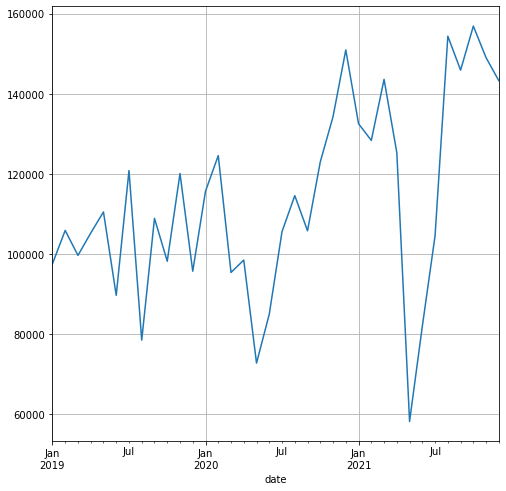

In [10]:
plt.figure(figsize=(8,8))
df["Corrected sales"].plot(grid=True)
plt.show()

In [11]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [12]:
adfuller(df["Corrected sales"])

(-2.979309520946383,
 0.03687233099053504,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 572.2961350405284)

In [13]:
from scipy import stats

In [14]:
df["power"],y=stats.boxcox(df["Corrected sales"])

In [15]:
y

0.9595509517404369

In [16]:
adfuller(df["power"])

(-2.992055236871151,
 0.03564303186394461,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 548.9108846014434)

In [35]:
df['MA1']=df["Corrected sales"].rolling(12).mean()
df["MA2"]=df['Corrected sales'].rolling(12).std()

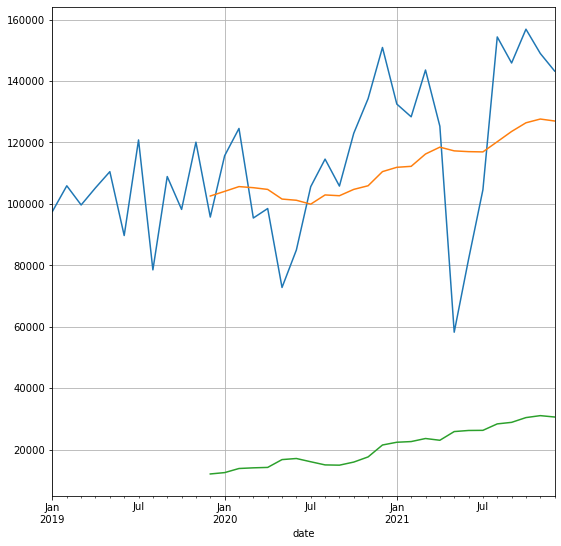

In [39]:
plt.figure(figsize=(9,9))
df["Corrected sales"].plot(grid=True)
df["MA1"].plot(grid=True)
df["MA2"].plot(grid=True)
plt.show()

In [17]:
df["1st difference"]=df["power"].diff()

In [18]:
df1=df.dropna(axis=0)

In [19]:
adfuller(df1["1st difference"])

(-7.463710648109803,
 5.271614370122176e-11,
 0,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 531.5557248994601)

<AxesSubplot:xlabel='date'>

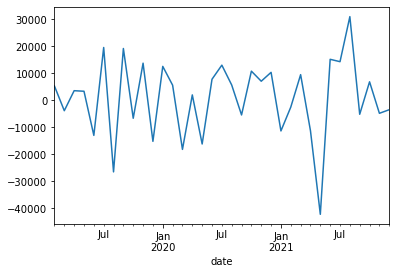

In [20]:
df1["1st difference"].plot()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

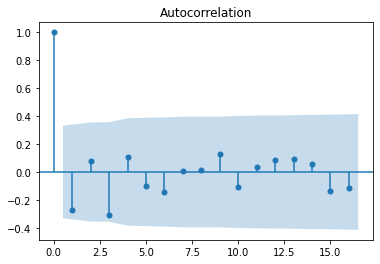

In [23]:
plot_acf(df1["1st difference"])
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


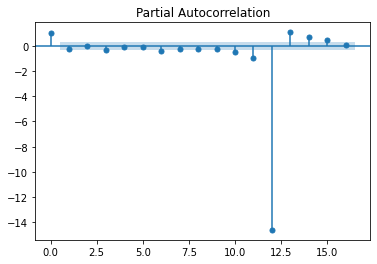

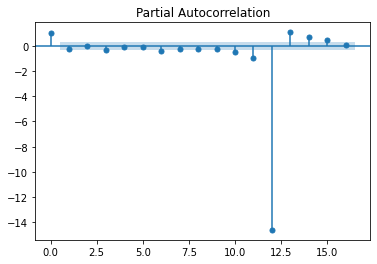

In [24]:
plot_pacf(df1["1st difference"])

In [25]:
from statsmodels.tsa.arima_model import ARMA
import itertools

In [26]:
p=q=range(0,8)
pq=list(itertools.product(p,q))
list1=[]
list2=[]
for order in pq:
    try:
        model=ARMA(df1["1st difference"],order=order)
        model_fit=model.fit()
        list1.append(order)
        list2.append(model_fit.aic)
    except: 
        continue

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [27]:
dlist1=pd.DataFrame(list1)
dlist1.rename(columns={0:"p",1:"q"},inplace=True)
dlist2=pd.DataFrame(list2)
dlist2.rename(columns={0:"Aic"},inplace=True)
table=pd.concat([dlist1,dlist2],axis=1)

In [28]:
table

,p,q,Aic
0,0,0,772.881114
1,0,1,772.024991
2,0,2,769.892699
3,0,3,NaN
4,0,4,768.562564
5,0,5,770.525163
6,0,6,NaN
7,0,7,NaN
8,1,0,772.299199
9,1,1,767.803704


In [29]:
table["Aic"].min()

767.8037038398912

In [30]:
data=table.query("Aic==Aic.min()")

In [31]:
data

,p,q,Aic
9,1,1,767.803704


In [32]:
model1=ARMA(df1["1st difference"],order=(1,1))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [33]:
model1_fit=model1.fit()

In [34]:
pred=model1_fit.predict(start='2019-02-01',end='2021-12-01')

<AxesSubplot:xlabel='date'>

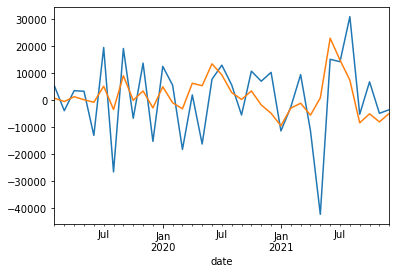

In [35]:
df1["1st difference"].plot()
pred.plot()

In [36]:
pr=model1_fit.predict()

In [37]:
pr1=pr.to_frame()

In [40]:
pr2= pr1[0]+df1["power"].shift(1)

In [41]:
pr2

2019-02-01             NaN
2019-03-01    68589.047467
2019-04-01    66476.775414
2019-05-01    68845.458813
2019-06-01    71199.778325
2019-07-01    64071.296806
2019-08-01    74960.238531
2019-09-01    60914.958125
2019-10-01    70921.507258
2019-11-01    67701.254896
2019-12-01    75111.862652
2020-01-01    67676.491005
2020-02-01    74249.938605
2020-03-01    77567.434970
2020-04-01    68786.024653
2020-05-01    69811.323109
2020-06-01    61683.301647
2020-07-01    65292.023134
2020-08-01    71733.091989
2020-09-01    74795.728281
2020-10-01    72446.008061
2020-11-01    78015.580319
2020-12-01    81939.874495
2021-01-01    87589.281191
2021-02-01    82738.936876
2021-03-01    81974.200193
2021-04-01    87014.948367
2021-05-01    82062.607836
2021-06-01    61877.150483
2021-07-01    68876.145162
2021-08-01    75705.280384
2021-09-01    90812.798803
2021-10-01    88919.937285
2021-11-01    92721.002378
2021-12-01    90987.412587
Freq: MS, dtype: float64

In [42]:
from scipy.special import boxcox, inv_boxcox

In [43]:
pr3=inv_boxcox(pr2,y)

In [44]:
pr3

2019-02-01              NaN
2019-03-01    105061.103721
2019-04-01    101691.509527
2019-05-01    105470.443513
2019-06-01    109231.898018
2019-07-01     97859.680244
2019-08-01    115250.736366
2019-09-01     92840.990685
2019-10-01    108787.032572
2019-11-01    103644.315082
2019-12-01    115493.691158
2020-01-01    103604.806670
2020-02-01    114112.864311
2020-03-01    119431.226510
2020-04-01    105375.555995
2020-05-01    107012.942190
2020-06-01     94061.695784
2020-07-01     99803.503606
2020-08-01    110084.698715
2020-09-01    114987.156926
2020-10-01    111225.111658
2020-11-01    120150.404295
2020-12-01    126455.397002
2021-01-01    135554.290222
2021-02-01    127740.796643
2021-03-01    126510.603694
2021-04-01    134628.116225
2021-05-01    126652.795923
2021-06-01     94369.774537
2021-07-01    105519.436075
2021-08-01    116444.752024
2021-09-01    140757.268386
2021-10-01    137701.098660
2021-11-01    143840.928263
2021-12-01    141039.331865
Freq: MS, dtype: flo

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
MSE=mean_squared_error(df1["Corrected sales"][1:],pr3[1:])

In [47]:
np.sqrt(MSE)

20037.43423432533

In [48]:
df1["Corrected sales"].mean()

113802.16857142857

In [49]:
forecast=model1_fit.predict(start='2022-01-01',end='2022-12-01')

In [50]:
forecast

2022-01-01   -2577.783042
2022-02-01    -778.717783
2022-03-01      37.024732
2022-04-01     406.903394
2022-05-01     574.615904
2022-06-01     650.661075
2022-07-01     685.141913
2022-08-01     700.776413
2022-09-01     707.865498
2022-10-01     711.079872
2022-11-01     712.537351
2022-12-01     713.198210
Freq: MS, dtype: float64

In [51]:
f1=forecast.to_frame()


In [52]:
f1

,0
2022-01-01,-2577.783042
2022-02-01,-778.717783
2022-03-01,37.024732
2022-04-01,406.903394
2022-05-01,574.615904
2022-06-01,650.661075
2022-07-01,685.141913
2022-08-01,700.776413
2022-09-01,707.865498
2022-10-01,711.079872


In [53]:
f1.rename(columns={0:"1 diff"},inplace=True)


In [54]:
f1

,1 diff
2022-01-01,-2577.783042
2022-02-01,-778.717783
2022-03-01,37.024732
2022-04-01,406.903394
2022-05-01,574.615904
2022-06-01,650.661075
2022-07-01,685.141913
2022-08-01,700.776413
2022-09-01,707.865498
2022-10-01,711.079872


In [55]:
p=df['power'][-1]


In [56]:
p

92349.27209799296

In [57]:
f1["power"]=np.NaN
f1["power"][0]=p

In [58]:
f1

,1 diff,power
2022-01-01,-2577.783042,92349.272098
2022-02-01,-778.717783,NaN
2022-03-01,37.024732,NaN
2022-04-01,406.903394,NaN
2022-05-01,574.615904,NaN
2022-06-01,650.661075,NaN
2022-07-01,685.141913,NaN
2022-08-01,700.776413,NaN
2022-09-01,707.865498,NaN
2022-10-01,711.079872,NaN


In [59]:
for i in range(1,12):
    f1["power"][i]= f1["power"][i-1]+f1["1 diff"][i]

In [63]:
f1["forecasted scaled back values"]=inv_boxcox(f1["power"],y)

In [64]:
f1

,1 diff,power,forecasted scaled back values
2022-01-01,-2577.783042,92349.272098,143240.000000
2022-02-01,-778.717783,91570.554315,141981.478656
2022-03-01,37.024732,91607.579048,142041.305831
2022-04-01,406.903394,92014.482442,142698.876118
2022-05-01,574.615904,92589.098346,143627.684429
2022-06-01,650.661075,93239.759421,144679.705355
2022-07-01,685.141913,93924.901334,145787.811114
2022-08-01,700.776413,94625.677747,146921.555663
2022-09-01,707.865498,95333.543245,148067.128594
2022-10-01,711.079872,96044.623116,149218.264564


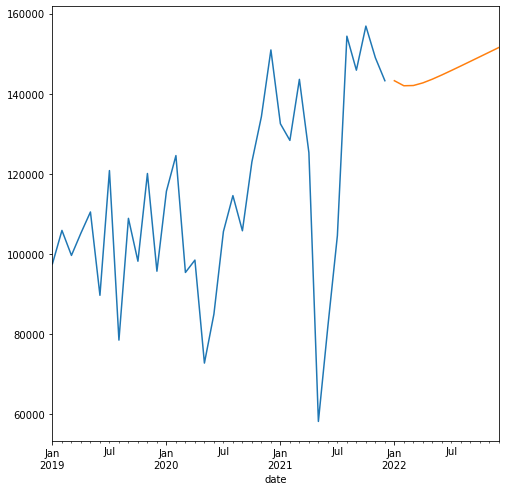

In [65]:
plt.figure(figsize=(8,8))
df["Corrected sales"].plot()
f1["forecasted scaled back values"].plot()
plt.show()